In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---
# Mouse
### Haber_10x

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,batch,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,organ,organism,platform,region
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1,enterocyte of epithelium of small intestine,CL:1000334,Enterocyte.Immature.Distal,Haber_10x,Small Intestine,Mus musculus,10x,epithelial cells
B1_AAACCGTGCCAAGT_Tuft,B1,brush cell,CL:0002204,Tuft,Haber_10x,Small Intestine,Mus musculus,10x,epithelial cells
B1_AAACGCACAGCCTA_Goblet,B1,small intestine goblet cell,CL:1000495,Goblet,Haber_10x,Small Intestine,Mus musculus,10x,epithelial cells
B1_AAACGCACCAGATC_Endocrine,B1,enteroendocrine cell,CL:0000164,Endocrine,Haber_10x,Small Intestine,Mus musculus,10x,epithelial cells
B1_AAACGCACCGCCTT_Stem,B1,stem cell,CL:0000034,Stem,Haber_10x,Small Intestine,Mus musculus,10x,epithelial cells


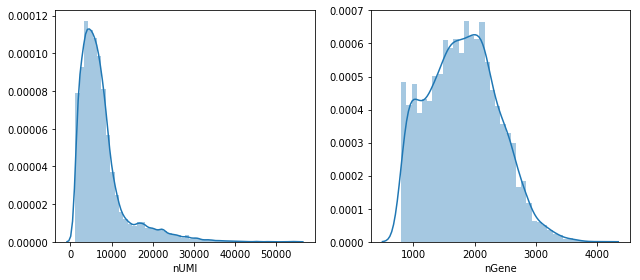

In [2]:
haber_10x = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Haber_10x/data.h5")
utils.peek(haber_10x, "Haber_10x")
haber_10x = haber_10x.normalize()
haber_10x.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="batch")
haber_10x_model = cb.directi.fit_DIRECTi(
    haber_10x, haber_10x.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Haber_10x/model_0"
)
haber_10x.latent = haber_10x_model.inference(haber_10x)

[DIRECTi epoch 0] train=2.653, val=2.690, time elapsed=1.8s Regular save...
[DIRECTi epoch 1] train=2.631, val=2.644, time elapsed=0.7s
[DIRECTi epoch 2] train=2.436, val=1.728, time elapsed=0.6s
[DIRECTi epoch 3] train=1.203, val=1.191, time elapsed=0.7s
[DIRECTi epoch 4] train=1.138, val=1.174, time elapsed=0.7s
[DIRECTi epoch 5] train=1.109, val=1.168, time elapsed=0.7s
[DIRECTi epoch 6] train=1.068, val=1.143, time elapsed=0.7s
[DIRECTi epoch 7] train=1.060, val=1.122, time elapsed=0.7s
[DIRECTi epoch 8] train=1.053, val=1.089, time elapsed=0.7s
[DIRECTi epoch 9] train=1.046, val=1.094, time elapsed=0.6s
[DIRECTi epoch 10] train=1.028, val=1.123, time elapsed=0.6s Regular save...
[DIRECTi epoch 11] train=1.009, val=1.109, time elapsed=0.7s
[DIRECTi epoch 12] train=1.001, val=1.075, time elapsed=0.6s
[DIRECTi epoch 13] train=0.996, val=1.049, time elapsed=0.7s
[DIRECTi epoch 14] train=0.992, val=1.049, time elapsed=0.7s
[DIRECTi epoch 15] train=0.987, val=1.028, time elapsed=0.7s
[D

[  Info   ] Computing tSNE...


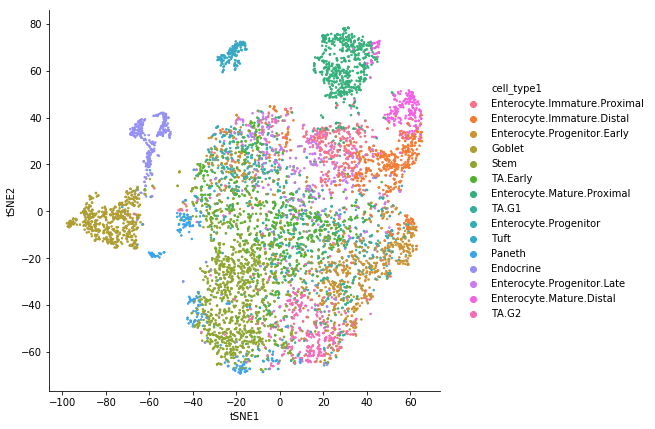

In [4]:
plot = haber_10x.visualize_latent("cell_type1")
plot.get_figure().savefig("Haber_10x/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


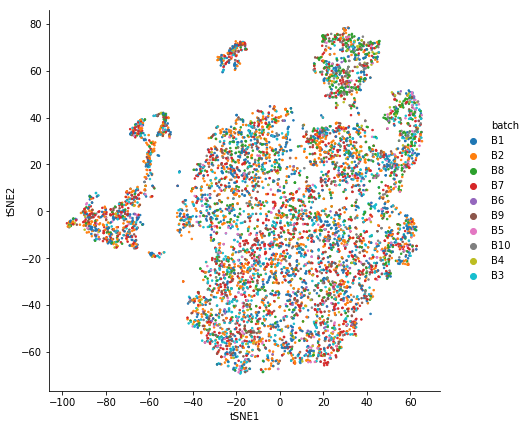

In [5]:
plot = haber_10x.visualize_latent("batch")
plot.get_figure().savefig("Haber_10x/batch.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


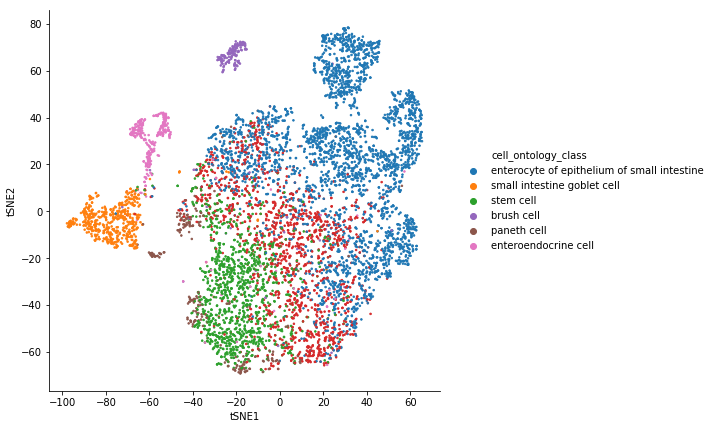

In [6]:
plot = haber_10x.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Haber_10x/cell_ontology_class.pdf", bbox_inches="tight")

In [7]:
%%capture capio
haber_10x_models = [haber_10x_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    haber_10x_models.append(cb.directi.fit_DIRECTi(
        haber_10x, haber_10x.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Haber_10x/model_%d" % i
    ))
haber_10x_blast = cb.blast.BLAST(haber_10x_models, haber_10x, 
                                               keep_exprs=True).build_empirical()
haber_10x_blast.save("Haber_10x")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x/model_1/checkpoint-115
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x/model_2/checkpoint-103
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x/model_3/checkpoint-130


In [8]:
with open("Haber_10x/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Haber_10x/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(haber_10x_blast, "Haber_10x")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.8642
Accuracy = 0.8719


### Haber_10x_FAE

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,batch,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,organ,organism,platform,region
CtlRep3_WT_AAACATACACCATG_Stem.TA,CtlRep3,stem cell,CL:0000034,Stem.TA,Haber_10x_FAE,WT,Small Intestine,Mus musculus,10x,follicle associated epithelia
CtlRep3_WT_AAACCGTGAACCAC_Stem.TA,CtlRep3,stem cell,CL:0000034,Stem.TA,Haber_10x_FAE,WT,Small Intestine,Mus musculus,10x,follicle associated epithelia
CtlRep3_WT_AAACGCACCGCATA_Entero.proximal,CtlRep3,enterocyte of epithelium of small intestine,CL:1000334,Entero.proximal,Haber_10x_FAE,WT,Small Intestine,Mus musculus,10x,follicle associated epithelia
CtlRep3_WT_AAACGGCTAACCTG_Entero.proximal,CtlRep3,enterocyte of epithelium of small intestine,CL:1000334,Entero.proximal,Haber_10x_FAE,WT,Small Intestine,Mus musculus,10x,follicle associated epithelia
CtlRep3_WT_AAAGACGAGACAAA_Stem.TA,CtlRep3,stem cell,CL:0000034,Stem.TA,Haber_10x_FAE,WT,Small Intestine,Mus musculus,10x,follicle associated epithelia


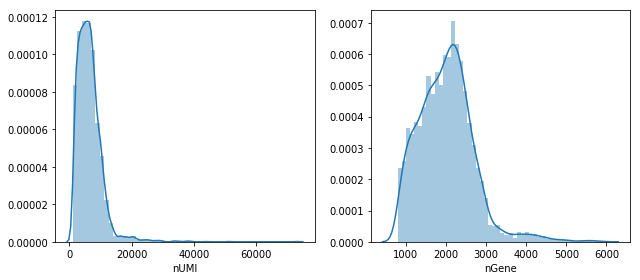

In [10]:
haber_10x_fae = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Haber_10x_FAE/data.h5")
utils.peek(haber_10x_fae, "Haber_10x_FAE")
haber_10x_fae = haber_10x_fae.normalize()
haber_10x_fae.obs.head()

In [11]:
opt_model_kwargs = dict(batch_effect="batch")
haber_10x_fae_model = cb.directi.fit_DIRECTi(
    haber_10x_fae, haber_10x_fae.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Haber_10x_FAE/model_0"
)
haber_10x_fae.latent = haber_10x_fae_model.inference(haber_10x_fae)

[DIRECTi epoch 0] train=3.199, val=3.210, time elapsed=1.1s Regular save...
[DIRECTi epoch 1] train=3.191, val=3.194, time elapsed=0.4s
[DIRECTi epoch 2] train=3.162, val=3.148, time elapsed=0.5s
[DIRECTi epoch 3] train=3.085, val=2.981, time elapsed=0.5s
[DIRECTi epoch 4] train=1.996, val=1.598, time elapsed=0.5s
[DIRECTi epoch 5] train=1.486, val=1.501, time elapsed=0.4s
[DIRECTi epoch 6] train=1.480, val=1.488, time elapsed=0.4s
[DIRECTi epoch 7] train=1.454, val=1.439, time elapsed=0.4s
[DIRECTi epoch 8] train=1.396, val=1.423, time elapsed=0.4s
[DIRECTi epoch 9] train=1.379, val=1.458, time elapsed=0.5s
[DIRECTi epoch 10] train=1.369, val=1.485, time elapsed=0.4s Regular save...
[DIRECTi epoch 11] train=1.358, val=1.474, time elapsed=0.5s
[DIRECTi epoch 12] train=1.343, val=1.567, time elapsed=0.5s
[DIRECTi epoch 13] train=1.328, val=1.577, time elapsed=0.5s
[DIRECTi epoch 14] train=1.305, val=1.963, time elapsed=0.4s
[DIRECTi epoch 15] train=1.291, val=1.891, time elapsed=0.5s
[D

[  Info   ] Computing tSNE...


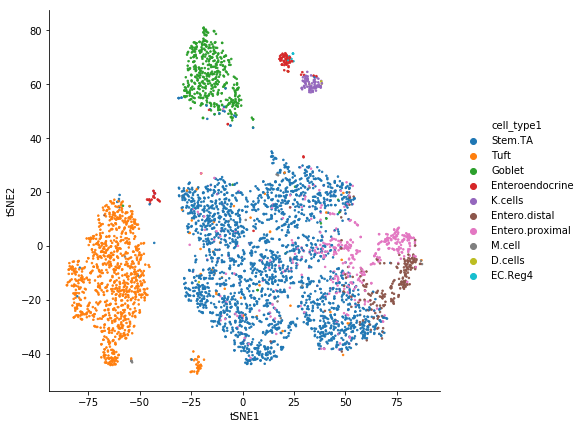

In [12]:
plot = haber_10x_fae.visualize_latent("cell_type1")
plot.get_figure().savefig("Haber_10x_FAE/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


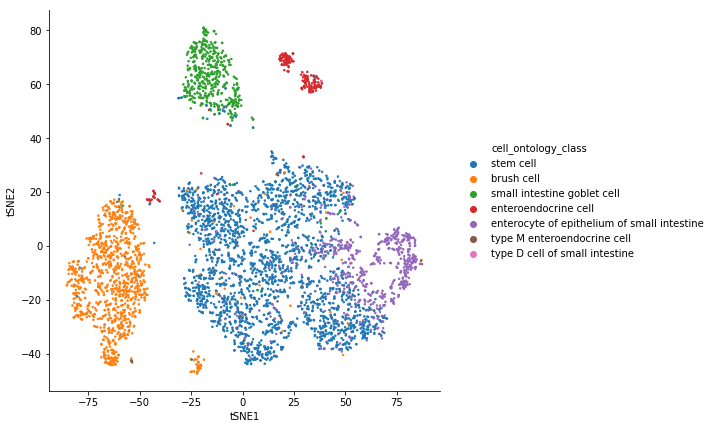

In [13]:
plot = haber_10x_fae.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Haber_10x_FAE/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


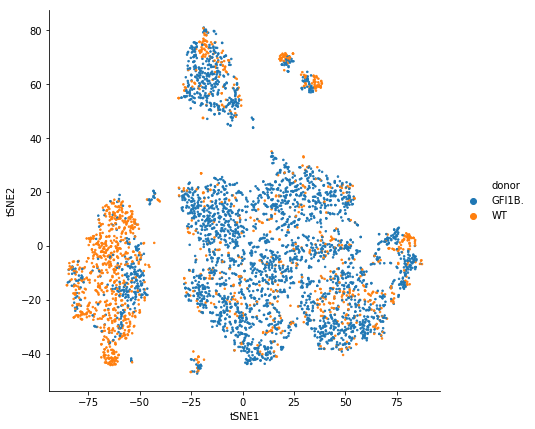

In [14]:
plot = haber_10x_fae.visualize_latent("donor")
plot.get_figure().savefig("Haber_10x_FAE/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


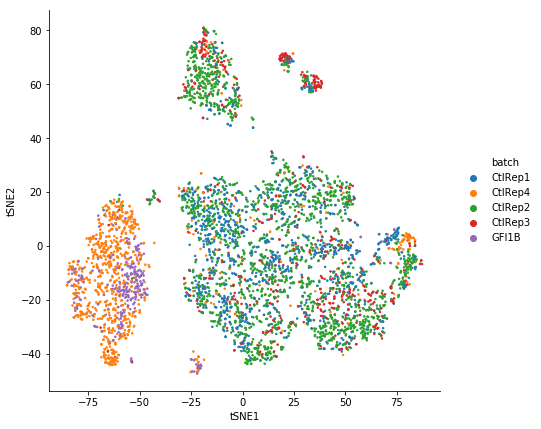

In [15]:
plot = haber_10x_fae.visualize_latent("batch")
plot.get_figure().savefig("Haber_10x_FAE/batch.pdf", bbox_inches="tight")

In [16]:
%%capture capio
haber_10x_fae_models = [haber_10x_fae_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    haber_10x_fae_models.append(cb.directi.fit_DIRECTi(
        haber_10x_fae, haber_10x_fae.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Haber_10x_FAE/model_%d" % i
    ))
haber_10x_fae_blast = cb.blast.BLAST(haber_10x_fae_models, haber_10x_fae, 
                                               keep_exprs=True).build_empirical()
haber_10x_fae_blast.save("Haber_10x_FAE")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x_FAE/model_1/checkpoint-129
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x_FAE/model_2/checkpoint-132
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x_FAE/model_3/checkpoint-148


In [17]:
with open("Haber_10x_FAE/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Haber_10x_FAE/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [18]:
utils.self_projection(haber_10x_fae_blast, "Haber_10x_FAE")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9398
Accuracy = 0.9357


### Haber_10x_largecell

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,batch,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,organ,organism,platform
AAACCTGAGTGGTAAT_M1_B1_Paneth.progenitor,B1,paneth cell,CL:0000510,Paneth.progenitor,Haber_10x_largecell,M1,Small Intestine,Mus musculus,10x
AAACCTGCAAGACACG_M1_B1_Paneth.progenitor,B1,paneth cell,CL:0000510,Paneth.progenitor,Haber_10x_largecell,M1,Small Intestine,Mus musculus,10x
AAACCTGGTAACGCGA_M1_B1_Enteroendocrine,B1,enteroendocrine cell,CL:0000164,Enteroendocrine,Haber_10x_largecell,M1,Small Intestine,Mus musculus,10x
AAACGGGAGGGAAACA_M1_B1_Paneth.2,B1,paneth cell,CL:0000510,Paneth.2,Haber_10x_largecell,M1,Small Intestine,Mus musculus,10x
AAACGGGGTCTAGTCA_M1_B1_Tuft,B1,brush cell,CL:0002204,Tuft,Haber_10x_largecell,M1,Small Intestine,Mus musculus,10x


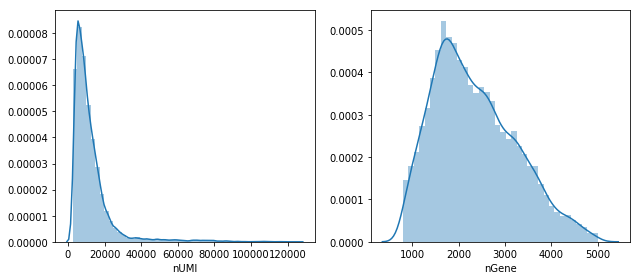

In [19]:
haber_10x_largecell = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Haber_10x_largecell/data.h5")
utils.peek(haber_10x_largecell, "Haber_10x_largecell")
haber_10x_largecell = haber_10x_largecell.normalize()
haber_10x_largecell.obs.head()

In [20]:
opt_model_kwargs = dict(batch_effect="batch")
haber_10x_largecell_model = cb.directi.fit_DIRECTi(
    haber_10x_largecell, haber_10x_largecell.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Haber_10x_largecell/model_0"
)
haber_10x_largecell.latent = haber_10x_largecell_model.inference(haber_10x_largecell)

[DIRECTi epoch 0] train=3.306, val=3.291, time elapsed=1.9s Regular save...
[DIRECTi epoch 1] train=3.188, val=2.234, time elapsed=1.0s
[DIRECTi epoch 2] train=1.460, val=2.497, time elapsed=1.0s
[DIRECTi epoch 3] train=1.324, val=5.001, time elapsed=1.1s
[DIRECTi epoch 4] train=1.200, val=2.112, time elapsed=1.1s
[DIRECTi epoch 5] train=1.182, val=1.565, time elapsed=1.1s
[DIRECTi epoch 6] train=1.172, val=1.301, time elapsed=1.0s
[DIRECTi epoch 7] train=1.154, val=1.185, time elapsed=1.0s
[DIRECTi epoch 8] train=1.127, val=1.143, time elapsed=1.0s
[DIRECTi epoch 9] train=1.105, val=1.130, time elapsed=1.1s
[DIRECTi epoch 10] train=1.098, val=1.128, time elapsed=1.0s Regular save...
[DIRECTi epoch 11] train=1.087, val=1.096, time elapsed=1.0s
[DIRECTi epoch 12] train=1.078, val=1.106, time elapsed=1.0s
[DIRECTi epoch 13] train=1.067, val=1.090, time elapsed=0.9s
[DIRECTi epoch 14] train=1.056, val=1.122, time elapsed=1.0s
[DIRECTi epoch 15] train=1.044, val=1.080, time elapsed=1.1s
[D

[  Info   ] Computing tSNE...


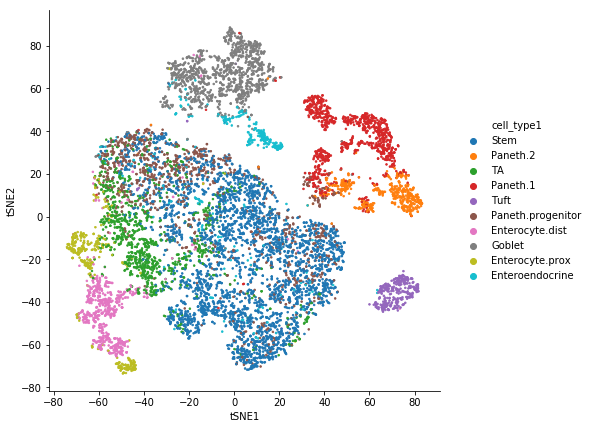

In [21]:
plot = haber_10x_largecell.visualize_latent("cell_type1")
plot.get_figure().savefig("Haber_10x_largecell/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


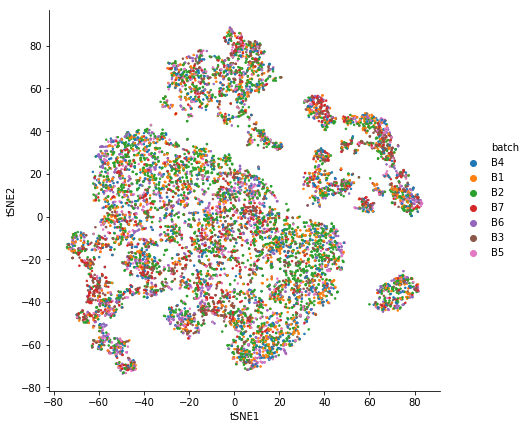

In [22]:
plot = haber_10x_largecell.visualize_latent("batch")
plot.get_figure().savefig("Haber_10x_largecell/batch.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


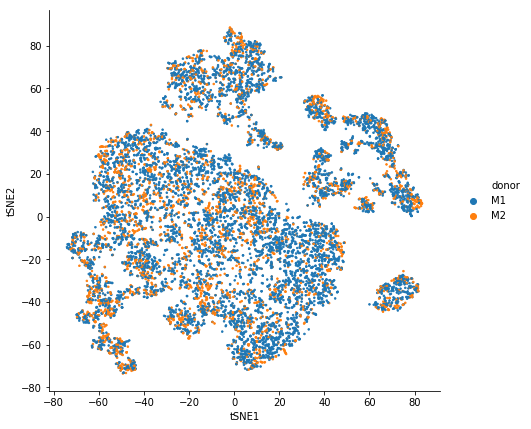

In [23]:
plot = haber_10x_largecell.visualize_latent("donor")
plot.get_figure().savefig("Haber_10x_largecell/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


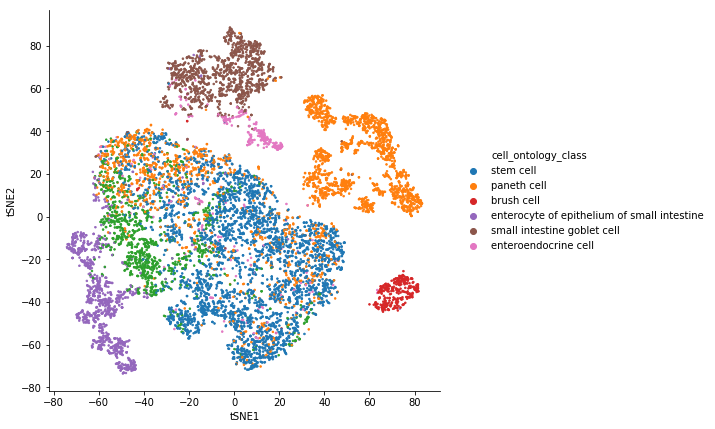

In [24]:
plot = haber_10x_largecell.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Haber_10x_largecell/cell_ontology_class.pdf", bbox_inches="tight")

In [25]:
%%capture capio
haber_10x_largecell_models = [haber_10x_largecell_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    haber_10x_largecell_models.append(cb.directi.fit_DIRECTi(
        haber_10x_largecell, haber_10x_largecell.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Haber_10x_largecell/model_%d" % i
    ))
haber_10x_largecell_blast = cb.blast.BLAST(haber_10x_largecell_models, haber_10x_largecell, keep_exprs=True).build_empirical()
haber_10x_largecell_blast.save("Haber_10x_largecell")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x_largecell/model_1/checkpoint-93
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x_largecell/model_2/checkpoint-95
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x_largecell/model_3/checkpoint-115


In [26]:
with open("Haber_10x_largecell/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Haber_10x_largecell/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [27]:
utils.self_projection(haber_10x_largecell_blast, "Haber_10x_largecell")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9307
Accuracy = 0.8933


### Haber_10x_region

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,organ,organism,platform,region
AAACATACGTTACG_Ileum_m1_Goblet,small intestine goblet cell,CL:1000495,Goblet,Haber_10x_region,m1,Small Intestine,Mus musculus,10x,Ileum
AAACATACTATGGC_Ileum_m1_Enterocyte,enterocyte of epithelium of small intestine,CL:1000334,Enterocyte,Haber_10x_region,m1,Small Intestine,Mus musculus,10x,Ileum
AAACCGTGGTCCTC_Ileum_m1_Stem,stem cell,CL:0000034,Stem,Haber_10x_region,m1,Small Intestine,Mus musculus,10x,Ileum
AAACGCACTCTACT_Ileum_m1_TA,,,TA,Haber_10x_region,m1,Small Intestine,Mus musculus,10x,Ileum
AAACGGCTCTTATC_Ileum_m1_Goblet,small intestine goblet cell,CL:1000495,Goblet,Haber_10x_region,m1,Small Intestine,Mus musculus,10x,Ileum


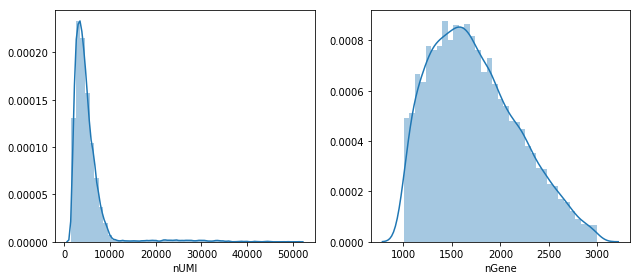

In [28]:
haber_10x_region = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Haber_10x_region/data.h5")
utils.peek(haber_10x_region, "Haber_10x_region")
haber_10x_region = haber_10x_region.normalize()
haber_10x_region.obs.head()

In [29]:
opt_model_kwargs = dict(batch_effect="donor")
haber_10x_region_model = cb.directi.fit_DIRECTi(
    haber_10x_region, haber_10x_region.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Haber_10x_region/model_0"
)
haber_10x_region.latent = haber_10x_region_model.inference(haber_10x_region)

[DIRECTi epoch 0] train=2.569, val=2.547, time elapsed=1.9s Regular save...
[DIRECTi epoch 1] train=2.214, val=0.964, time elapsed=1.2s
[DIRECTi epoch 2] train=0.905, val=0.904, time elapsed=1.2s
[DIRECTi epoch 3] train=0.891, val=0.909, time elapsed=1.2s
[DIRECTi epoch 4] train=0.859, val=1.321, time elapsed=1.2s
[DIRECTi epoch 5] train=0.835, val=0.933, time elapsed=1.2s
[DIRECTi epoch 6] train=0.817, val=0.867, time elapsed=1.2s
[DIRECTi epoch 7] train=0.803, val=0.804, time elapsed=1.2s
[DIRECTi epoch 8] train=0.797, val=0.803, time elapsed=1.2s
[DIRECTi epoch 9] train=0.792, val=0.795, time elapsed=1.2s
[DIRECTi epoch 10] train=0.788, val=0.792, time elapsed=1.2s Regular save...
[DIRECTi epoch 11] train=0.784, val=0.788, time elapsed=1.2s
[DIRECTi epoch 12] train=0.779, val=0.788, time elapsed=1.2s
[DIRECTi epoch 13] train=0.772, val=0.780, time elapsed=1.2s
[DIRECTi epoch 14] train=0.766, val=0.774, time elapsed=1.2s
[DIRECTi epoch 15] train=0.761, val=0.770, time elapsed=1.2s
[D

[  Info   ] Computing tSNE...


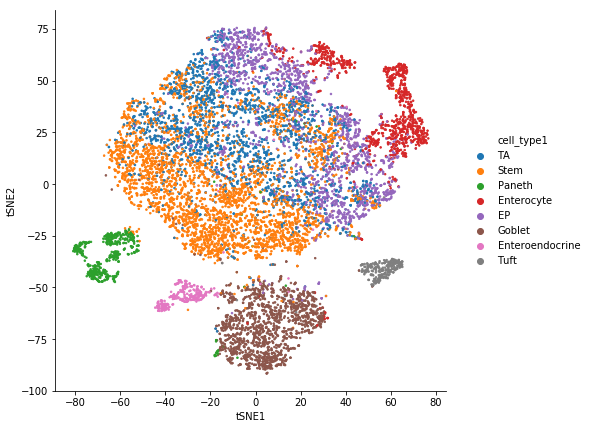

In [30]:
plot = haber_10x_region.visualize_latent("cell_type1")
plot.get_figure().savefig("Haber_10x_region/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


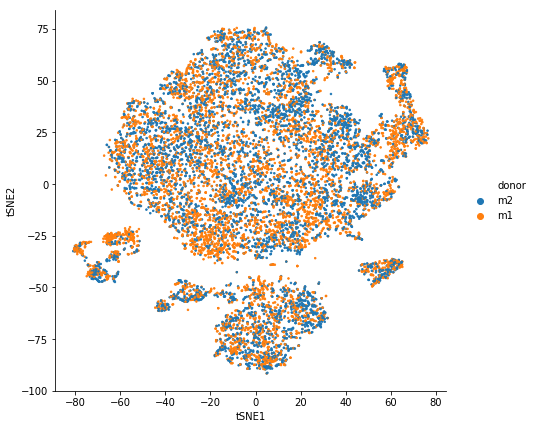

In [31]:
plot = haber_10x_region.visualize_latent("donor")
plot.get_figure().savefig("Haber_10x_region/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


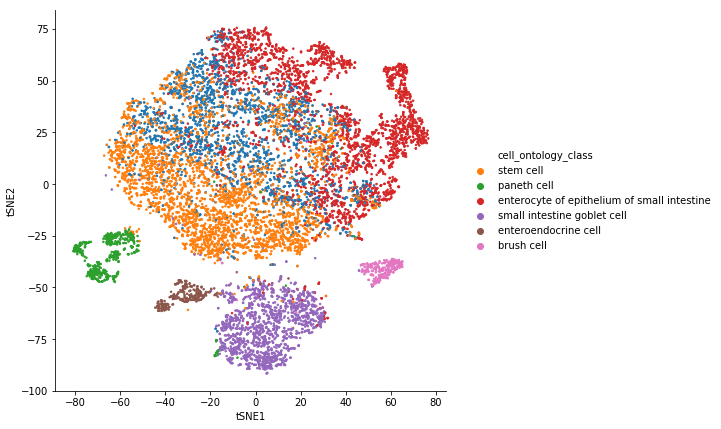

In [32]:
plot = haber_10x_region.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Haber_10x_region/cell_ontology_class.pdf", bbox_inches="tight")

In [33]:
%%capture capio
haber_10x_region_models = [haber_10x_region_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    haber_10x_region_models.append(cb.directi.fit_DIRECTi(
        haber_10x_region, haber_10x_region.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Haber_10x_region/model_%d" % i
    ))
haber_10x_region_blast = cb.blast.BLAST(haber_10x_region_models, haber_10x_region, 
                                               keep_exprs=True).build_empirical()
haber_10x_region_blast.save("Haber_10x_region")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x_region/model_1/checkpoint-120
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x_region/model_2/checkpoint-90
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Haber_10x_region/model_3/checkpoint-136


In [34]:
with open("Haber_10x_region/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Haber_10x_region/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [35]:
utils.self_projection(haber_10x_region_blast, "Haber_10x_region")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9114
Accuracy = 0.8829


## Mouse aligned

In [36]:
if not os.path.exists("ALIGNED_Mus_musculus_Small_Intestine"):
    os.makedirs("ALIGNED_Mus_musculus_Small_Intestine")
haber_smart_seq2 = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Haber_Smart-seq2/data.h5").normalize()
haber_10x.obs["haber_10x_batch"] = haber_10x.obs["batch"]
haber_10x_fae.obs["haber_10x_fae_batch"] = haber_10x_fae.obs["batch"]
haber_10x_largecell.obs["haber_10x_largecell_batch"] = haber_10x_largecell.obs["batch"]
haber_10x_region.obs["haber_10x_region_donor"] = haber_10x_region.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    haber_10x=haber_10x,
    haber_10x_fae=haber_10x_fae,
    haber_10x_largecell=haber_10x_largecell,
    haber_10x_region=haber_10x_region,
    haber_smart_seq2=haber_smart_seq2
), merge_uns_slots=["seurat_genes"])

[ Warning ] 13916 out of 29887 variables are not found, will be set to zero!
[ Warning ] 13723 out of 29887 variables are not found, will be set to zero!
[ Warning ] 1889 out of 29887 variables are not found, will be set to zero!
[ Warning ] 1889 out of 29887 variables are not found, will be set to zero!
[ Warning ] 9779 out of 29887 variables are not found, will be set to zero!
[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [37]:
mouse.obs.head()

,batch,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,haber_10x_batch,haber_10x_fae_batch,haber_10x_largecell_batch,haber_10x_region_donor,...,latent_6,latent_7,latent_8,latent_9,organ,organism,platform,region,tSNE1,tSNE2
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1,enterocyte of epithelium of small intestine,CL:1000334,Enterocyte.Immature.Distal,Haber_10x,NaN,B1,NaN,NaN,NaN,...,1.634286,1.343301,0.915529,-0.358234,Small Intestine,Mus musculus,10x,epithelial cells,49.511810,19.180820
B1_AAACCGTGCCAAGT_Tuft,B1,brush cell,CL:0002204,Tuft,Haber_10x,NaN,B1,NaN,NaN,NaN,...,0.551216,-1.012591,0.308597,-0.864234,Small Intestine,Mus musculus,10x,epithelial cells,-25.920935,60.412788
B1_AAACGCACAGCCTA_Goblet,B1,small intestine goblet cell,CL:1000495,Goblet,Haber_10x,NaN,B1,NaN,NaN,NaN,...,-0.417720,0.878338,0.133450,2.633146,Small Intestine,Mus musculus,10x,epithelial cells,-68.819298,-10.963532
B1_AAACGCACCAGATC_Endocrine,B1,enteroendocrine cell,CL:0000164,Endocrine,Haber_10x,NaN,B1,NaN,NaN,NaN,...,0.159367,-0.907993,2.613439,0.891216,Small Intestine,Mus musculus,10x,epithelial cells,-50.313824,32.867989
B1_AAACGCACCGCCTT_Stem,B1,stem cell,CL:0000034,Stem,Haber_10x,NaN,B1,NaN,NaN,NaN,...,1.389255,-0.943235,-1.031197,-0.335602,Small Intestine,Mus musculus,10x,epithelial cells,-24.581327,-42.863342


In [38]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "haber_10x_batch", "haber_10x_fae_batch", \
                  "haber_10x_largecell_batch", "haber_10x_region_donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Small_Intestine/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=1.720, val=0.864, time elapsed=6.7s Regular save...
[DIRECTi epoch 1] train=0.816, val=0.820, time elapsed=5.4s
[DIRECTi epoch 2] train=0.745, val=0.742, time elapsed=5.4s
[DIRECTi epoch 3] train=0.712, val=0.703, time elapsed=5.4s
[DIRECTi epoch 4] train=0.694, val=0.687, time elapsed=5.3s
[DIRECTi epoch 5] train=0.685, val=0.681, time elapsed=5.4s
[DIRECTi epoch 6] train=0.678, val=0.673, time elapsed=5.4s
[DIRECTi epoch 7] train=0.673, val=0.675, time elapsed=5.4s
[DIRECTi epoch 8] train=0.670, val=0.668, time elapsed=5.5s
[DIRECTi epoch 9] train=0.667, val=0.664, time elapsed=5.4s
[DIRECTi epoch 10] train=0.665, val=0.663, time elapsed=5.5s Regular save...
[DIRECTi epoch 11] train=0.663, val=0.664, time elapsed=5.4s
[DIRECTi epoch 12] train=0.662, val=0.660, time elapsed=5.4s
[DIRECTi epoch 13] train=0.661, val=0.662, time elapsed=5.5s
[DIRECTi epoch 14] train=0.660, val=0.659, time elapsed=5.5s
[DIRECTi epoch 15] train=0.659, val=0.659, time elapsed=5.5s
[D

[  Info   ] Computing tSNE...


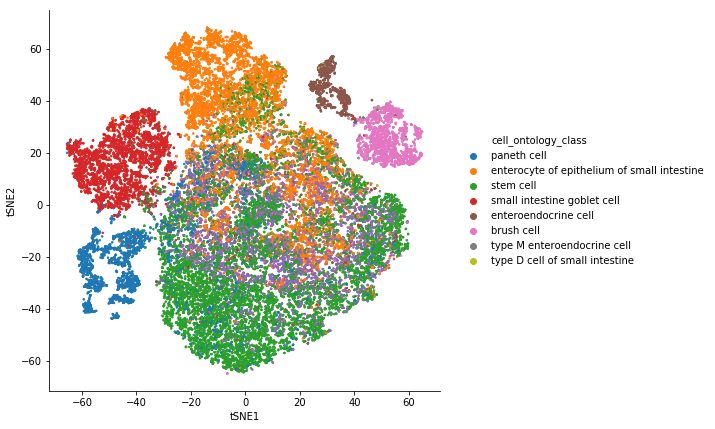

In [39]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Small_Intestine/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


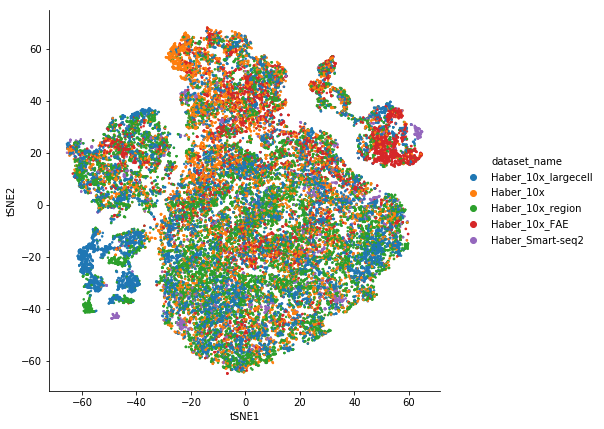

In [40]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Small_Intestine/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


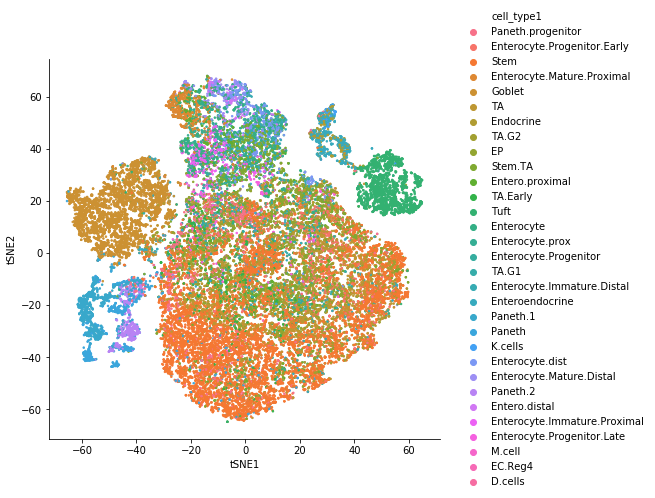

In [41]:
plot = mouse.visualize_latent("cell_type1")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Small_Intestine/cell_type1.pdf", bbox_inches="tight")

In [42]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Small_Intestine/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Small_Intestine")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Small_Intestine/model_1/checkpoint-44
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Small_Intestine/model_2/checkpoint-21
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Small_Intestine/model_3/checkpoint-24


In [43]:
with open("ALIGNED_Mus_musculus_Small_Intestine/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Small_Intestine/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [44]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Small_Intestine")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.8428
Accuracy = 0.8488
